In [7]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from scipy.spatial.distance import cdist

In [8]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
tform = MinMaxScaler()

def fileFeedforGNN(name):

  data = pd.read_table(name)

  

  y = data.iloc[:,-3].values
  
  
  print(np.unique(y))


  graphList = []
  


    
  #num_objects	r_std	r_var	r_mean	r_min	r_max	snr_std	snr_var	snr_mean	snr_min	snr_max	noise_std	noise_var	noise_mean	noise_min	noise_max	obj	environment	
  X_array = data.iloc[:, 0:16].values

  X_array = tform.fit_transform(X_array)
  

  addList_bot, addList_clothes, addList_plastics, addList_steel  = [],[],[],[]
    
  for i in range(len(X_array)):
    intarray = X_array[i]
    if(y[i] =='bot'):
      addList_bot.append(intarray)
    elif (y[i] == 'clothes'):
      addList_clothes.append(intarray)
    elif (y[i] == 'plastic'):
      addList_plastics.append(intarray)
    elif (y[i] == 'steel'):
      addList_steel.append(intarray)
  
  len_img = 32
  for i in range(len(addList_bot) - len_img-1 ):
        
        img = np.array(addList_bot[i:i+len_img])
        
        # if(i<1):
        #     print(img)
        
        graphList.append((img,0))

  for i in range(len(addList_clothes)  - len_img-1):
    
        img = np.array(addList_clothes[i:i+len_img])
        
        # if(i<1):
        #     print(img)
        
        graphList.append((img,1))
        
  for i in range(len(addList_plastics) - len_img-1):
        img = np.array(addList_plastics[i:i+len_img])
        
        # if(i<1):
        #     print(img)
            
        graphList.append((img,2))
        
  for i in range(len(addList_steel) - len_img-1):
    
        img = np.array(addList_steel[i:i+len_img])
        
        # if(i<1):
        #     print(img)
        graphList.append((img,3))
  
  
  
  print(len(graphList))
    
    
 
  return graphList




############################## data loading for 3.5 inch#####################

graphList_lablight_3_5 = fileFeedforGNN('lablight_3.5_.txt')
graphList_night_3_5 = fileFeedforGNN('night_3.5_.txt')
graphList_sunny_3_5 = fileFeedforGNN('sunny_3.5_.txt')


lablight_train_len = int(len(graphList_lablight_3_5)*0.7)
night_train_len = int(len(graphList_night_3_5)*0.7)
sunny_tarin_len = int(len(graphList_sunny_3_5)*0.7)


batch_size=64
test_batch_size=64

random.shuffle(graphList_lablight_3_5)
random.shuffle(graphList_night_3_5)
random.shuffle(graphList_sunny_3_5)

train_loader_lablight_3_5 = torch.utils.data.DataLoader(graphList_lablight_3_5[0:lablight_train_len],batch_size)  
test_loader_lablight_3_5 = torch.utils.data.DataLoader(graphList_lablight_3_5[lablight_train_len:],test_batch_size) 

train_loader_night_3_5 = torch.utils.data.DataLoader(graphList_night_3_5[0:night_train_len],batch_size)  
test_loader_night_3_5 = torch.utils.data.DataLoader(graphList_night_3_5[night_train_len:],test_batch_size) 

train_loader_sunny_3_5 = torch.utils.data.DataLoader(graphList_sunny_3_5[0:sunny_tarin_len],batch_size)  
test_loader_sunny_3_5 = torch.utils.data.DataLoader(graphList_sunny_3_5[sunny_tarin_len:],test_batch_size) 

print(len(graphList_lablight_3_5))
print(len(graphList_night_3_5))
print(len(graphList_sunny_3_5))



############################## data loading for 7 inch#####################

graphList_lablight_7= fileFeedforGNN('lablight_7_.txt')
graphList_night_7 = fileFeedforGNN('night_7_.txt')
graphList_sunny_7 = fileFeedforGNN('sunny_7_.txt')


lablight_train_len = int(len(graphList_lablight_7)*0.7)
night_train_len = int(len(graphList_night_7)*0.7)
sunny_tarin_len = int(len(graphList_sunny_7)*0.7)


batch_size=64
test_batch_size=64

random.shuffle(graphList_lablight_7)
random.shuffle(graphList_night_7)
random.shuffle(graphList_sunny_7)

train_loader_lablight_7 = torch.utils.data.DataLoader(graphList_lablight_7[0:lablight_train_len],batch_size)  
test_loader_lablight_7 = torch.utils.data.DataLoader(graphList_lablight_7[lablight_train_len:],test_batch_size) 

train_loader_night_7 = torch.utils.data.DataLoader(graphList_night_7[0:night_train_len],batch_size)  
test_loader_night_7 = torch.utils.data.DataLoader(graphList_night_7[night_train_len:],test_batch_size) 

train_loader_sunny_7= torch.utils.data.DataLoader(graphList_sunny_7[0:sunny_tarin_len],batch_size)  
test_loader_sunny_7= torch.utils.data.DataLoader(graphList_sunny_7[sunny_tarin_len:],test_batch_size) 

print(len(graphList_lablight_7))
print(len(graphList_night_7))
print(len(graphList_sunny_7))


['bot' 'clothes' 'plastic' 'steel']
4084
['bot' 'clothes' 'plastic' 'steel']
3575
['bot' 'clothes' 'plastic' 'steel']
3562
4084
3575
3562
['bot' 'clothes' 'plastic' 'steel']
3852
['bot' 'clothes' 'plastic' 'steel']
3803
['bot' 'clothes' 'plastic' 'steel']
3445
3852
3803
3445


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 

class_labels = 4
classes = ('bot', 'clothes', 'plastic', 'steel')


conv_row,conv_col = 28,10
out_channel = 1
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 2, 3)
        self.conv2 = nn.Conv2d(2, 2, 3)
        self.conv3 = nn.Conv2d(2, 1, 3)
        #self.conv4 = nn.Conv2d(2, 1, 3)
        
        #self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(out_channel* conv_row *conv_col, 64)
        #self.fc2 = nn.Linear(128, 64)
        self.fc3 =  nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 4)
        

    def forward(self, x):
       
        x = F.relu(self.conv1(x))
    
        x = F.relu(self.conv2(x))  
    
        
        #x =F.relu(self.conv3(x))
        x =F.relu(self.conv3(x))
        
        #print(x.shape)
        
        x = x.view(-1, out_channel* conv_row *conv_col)           
        
        #print(x.shape)
        x = F.relu(self.fc1(x))              
        #x = F.relu(self.fc2(x))            
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


def testAccuracy(model,test_loader):  
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        n_class_correct = [0 for i in range(class_labels)]
        n_class_samples = [0 for i in range(class_labels)]
        for images, labels in test_loader:

            #images = images.FloatTensor()
            images = images.to(device).float()
            labels = labels.to(device)
            outputs = model(images)
            # max returns (value ,index)
            _, predicted = torch.max(outputs, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

            for i in range(len(labels)):
                label = labels[i]
                pred = predicted[i]
                if (label == pred):
                    n_class_correct[label] += 1
                n_class_samples[label] += 1
        
        
        #print('testing accuracy')

        total_acc = 100.0 * n_correct / n_samples
        #print(f'Accuracy of the network: {total_acc} %')


        for i in range(class_labels):
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            #print(f'Accuracy of {classes[i]}: {acc} %')
        
        return total_acc

    
def modelTrainer(train_loader,test_loader):
    
    num_epochs = 150
    batch_size = 64
    learning_rate = 0.001

    class_labels = 4

    #train_loader, test_loader = train_loader_lablight_3_5,test_loader_lablight_3_5 


    print(len(train_loader)*64)

    classes = ('bot', 'clothes', 'plastic', 'steel')

    # get some random training images
    dataiter = iter(train_loader)
    images, labels = next(dataiter)

    model = ConvNet().to(device)
    print(model)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


    bestaccuracy = 0
    bestepoch = 0

    accList = []
    lossList = []

    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # origin shape: [4, 3, 32, 32] = 4, 3, 1024
            # input_layer: 3 input channels, 6 output channels, 5 kernel size
            
            print(images.shape)

            #images = images.float()
            images = images.to(device).float()
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
       
        accuracy = testAccuracy(model,test_loader)

        print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f},Accuracy: {accuracy} ')
        
        accList.append(accuracy)
        lossList.append(loss.item())

        if(bestaccuracy < accuracy):
            bestaccuracy = accuracy
            bestepoch = epoch
            PATH = './cnn.pth'
            torch.save(model.state_dict(), PATH)


    print('Finished Training')
  

    print(bestaccuracy)
    print(bestepoch)
    
    return accList,lossList



print("7")
print("train lablight and test lablight")
accList_7_lab,lossList_7_lab = modelTrainer(train_loader_lablight_7,test_loader_lablight_7)
# print("train lablight and test night")
# accList_7_lab_night,lossList_7_lab_night = modelTrainer(train_loader_lablight_7,test_loader_night_7)
# print("train lablight and test sunny")
# accList_7_lab_sunny,lossList_7_lab_sunny = modelTrainer(train_loader_lablight_7,test_loader_sunny_7)
# print("train night and test night")
# accList_7_night,lossList_7_night = modelTrainer(train_loader_night_7,test_loader_night_7)
# print("train night and test lablight")
# accList_7_night_lab,lossList_7_night_lab = modelTrainer(train_loader_night_7,test_loader_lablight_7)
# print("train night and test sunny")
# accList_7_night_sunny,lossList_7_night_sunny = modelTrainer(train_loader_night_7,test_loader_sunny_7)
# print("train sunny and test sunny")
# accList_7_sunny,lossList_7_sunny = modelTrainer(train_loader_sunny_7,test_loader_sunny_7)
# print("train sunny and test night")
# accList_7_sunny_night,lossList_7_sunny_night = modelTrainer(train_loader_sunny_7,test_loader_night_7)
# print("train sunny and test lablight")
# accList_7_sunny_lab,lossList_7_sunny_lab = modelTrainer(train_loader_sunny_7,test_loader_lablight_7)




7
train lablight and test lablight
2752
ConvNet(
  (conv1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(2, 1, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=280, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=4, bias=True)
)
torch.Size([64, 32, 16])


RuntimeError: Expected 4-dimensional input for 4-dimensional weight [2, 1, 3, 3], but got 3-dimensional input of size [64, 32, 16] instead

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


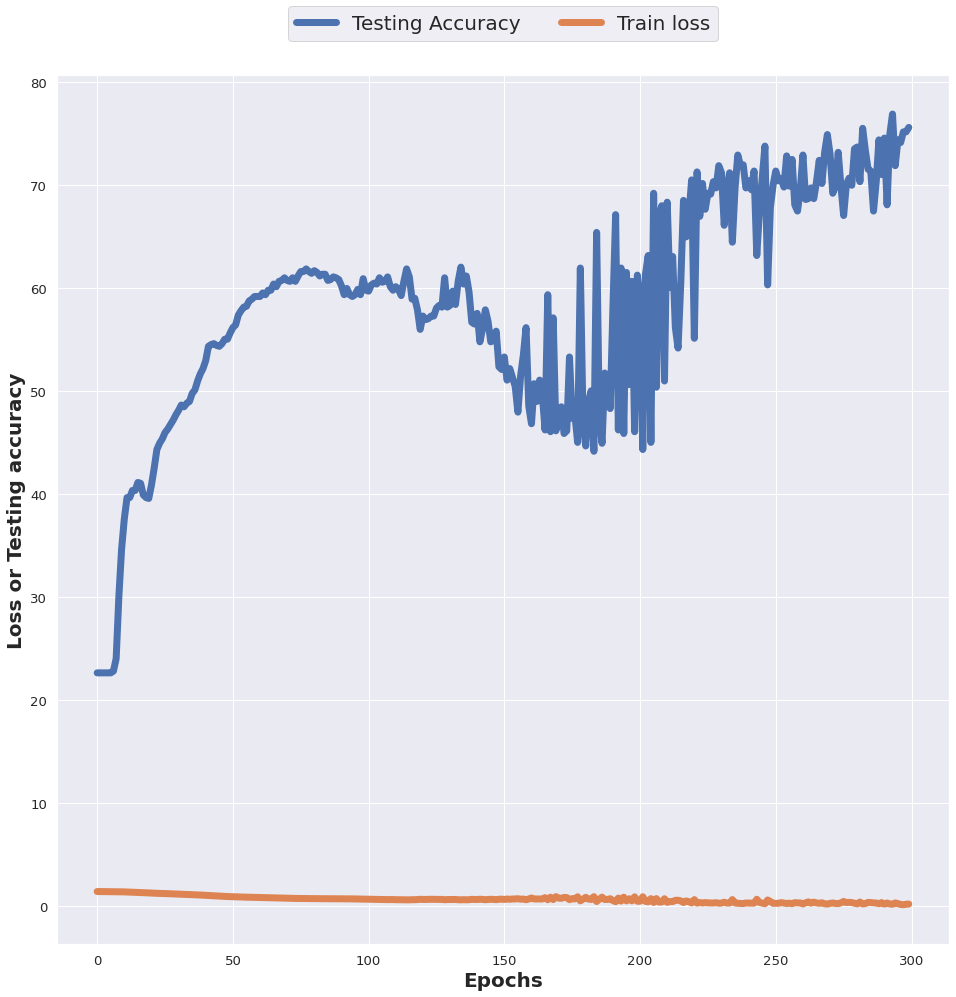

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = [i for i in range(300)]


sns.set(rc={'figure.figsize':(16,16) },font_scale=1.2)
fig, ax0 = plt.subplots(1, 1)

y1 = accList_7_lab

    #print(y)
var = 7

# plotting strip plot with seaborn
sns.lineplot(x, y1,ax=ax0,linewidth = var)


y2 = lossList_7_lab
#print(y)

sns.lineplot(x, y2, ax = ax0,linewidth = var)

# giving labels to x-axis and y-axis
ax0.set(xlabel ='Epochs', ylabel ='Loss or Testing accuracy')

ax0.set_xlabel(ax0.get_xlabel(), fontdict={'weight': 'bold'}, fontsize = 20)
ax0.set_ylabel(ax0.get_ylabel(), fontdict={'weight': 'bold'},fontsize = 20)
ax0.legend(['Testing Accuracy', 'Train loss'],fontsize = 20,loc='upper center',bbox_to_anchor=(0.5, 1.09),
ncol=2)

plt.savefig('lablight'+'.PNG', bbox_inches = "tight")
    

In [57]:



!pip3 install seaborn

     |████████████████████████████████| 292 kB 14.9 MB/s            
